# LEGO Analysis

This analysis intends to find the answers to the following questions:

1. How many LEGO sets have been released since 1970? Is there a noticable trend?

2. Which has been the most popular theme in each decade?

3. Is there a relationship between the price of a set and its number of pieces?

4. Are LEGO minifigures most closely tied to licensed sets?

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [13]:
# load the dataset into dataframe and take a quick look at the top 5 rows of the dataset
df = pd.read_csv("lego_sets.csv")
df.head()

,set_id,name,year,theme,subtheme,themeGroup,category,pieces,minifigs,agerange_min,US_retailPrice,bricksetURL,thumbnailURL,imageURL
0,1-8,Small house set,1970,Minitalia,NaN,Vintage,Normal,67.0,NaN,NaN,NaN,https://brickset.com/sets/1-8,https://images.brickset.com/sets/small/1-8.jpg,https://images.brickset.com/sets/images/1-8.jpg
1,2-8,Medium house set,1970,Minitalia,NaN,Vintage,Normal,109.0,NaN,NaN,NaN,https://brickset.com/sets/2-8,https://images.brickset.com/sets/small/2-8.jpg,https://images.brickset.com/sets/images/2-8.jpg
2,3-6,Medium house set,1970,Minitalia,NaN,Vintage,Normal,158.0,NaN,NaN,NaN,https://brickset.com/sets/3-6,https://images.brickset.com/sets/small/3-6.jpg,https://images.brickset.com/sets/images/3-6.jpg
3,4-4,Large house set,1970,Minitalia,NaN,Vintage,Normal,233.0,NaN,NaN,NaN,https://brickset.com/sets/4-4,https://images.brickset.com/sets/small/4-4.jpg,https://images.brickset.com/sets/images/4-4.jpg
4,4-6,Mini House and Vehicles,1970,Samsonite,Model Maker,Vintage,Normal,NaN,NaN,NaN,NaN,https://brickset.com/sets/4-6,NaN,NaN


In [14]:
# any duplicates?
df[df.duplicated()]

,set_id,name,year,theme,subtheme,themeGroup,category,pieces,minifigs,agerange_min,US_retailPrice,bricksetURL,thumbnailURL,imageURL


In [15]:
# noticed several NaN values from the dataset quick look, let's analyze further
df.isnull().sum()

set_id                0
name                  0
year                  0
theme                 0
subtheme           3556
themeGroup            2
category              0
pieces             3924
minifigs          10058
agerange_min      11670
US_retailPrice    11475
bricksetURL           0
thumbnailURL       1006
imageURL           1006
dtype: int64

### No NaN values in the columns used for question 1 and 2 (['year', 'theme']). If I cleaned the dataset now, I'd be missing data for question 1 and 2. So instead, let's analyze and answer those questions first, then clean the data in preparation for questions 3 and 4.

In [16]:
# checking datatypes of each column
print(df.dtypes)

set_id             object
name               object
year                int64
theme              object
subtheme           object
themeGroup         object
category           object
pieces            float64
minifigs          float64
agerange_min      float64
US_retailPrice    float64
bricksetURL        object
thumbnailURL       object
imageURL           object
dtype: object


***

## Q1: How many LEGO sets have been released since 1970? Is there a noticable trend?

In [17]:
# since each LEGO set has a unique set_id with no missing or duplicate values, we can check the length to get the total amount
total_sets = len(df)
print(f"Total number of LEGO sets released between 1970 - 2022: {total_sets}")

Total number of LEGO sets released between 1970 - 2022: 18457


In [18]:
# group the data by year, count the number of sets per year
yearly_counts = df.groupby('year')['set_id'].count()

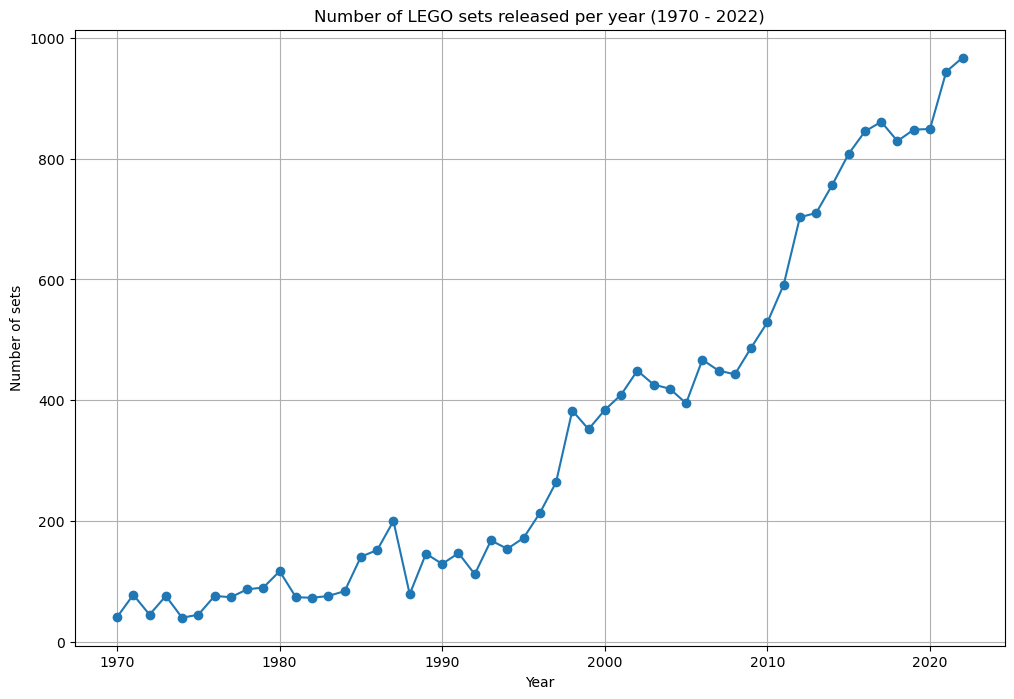

In [19]:
# plot data using linechart to show trend
plt.figure(figsize = (12, 8))
plt.plot(yearly_counts.index, yearly_counts.values, marker = "o")
plt.title("Number of LEGO sets released per year (1970 - 2022)")
plt.xlabel("Year")
plt.ylabel("Number of sets")
plt.grid(True)

plt.show()

In [20]:
# calculate the number of sets released in 1970 and 2022
sets_1970 = df.loc[df['year'] == 1970, 'set_id'].count()
sets_2022 = df.loc[df['year'] == 2022, 'set_id'].count()

# calculate the percentage increase
percentage_increase = ((sets_2022 - sets_1970) / sets_1970) * 100

print(f"Number of sets in 1970: {sets_1970}")
print(f"Number of sets in 2022: {sets_2022}")
print(f"Percentage increase from 1970 to 2022: {percentage_increase:.2f}%")

Number of sets in 1970: 41
Number of sets in 2022: 967
Percentage increase from 1970 to 2022: 2258.54%


### We can see that LEGO sets per year is trending upward and LEGO released 41 sets in 1970 versus 967 sets in 2022. That is an increase of 2258.54%!

***

## Q2: Which has been the most popular theme in each decade?

In [21]:
# create decade column to use for trend analysis
df['decade'] = (df['year'] // 10) * 10

In [22]:
# ensure 2020 is categorized as part of 2020-2029
df.loc[df['year'] >= 2020, 'decade'] = 2020

In [23]:
# group by decade and theme and count occurrences for each grouping
theme_counts = df.groupby(['decade', 'theme']).size().reset_index(name = 'count')

# sort by decade ASC and then by count DESC
theme_counts_sorted = theme_counts.sort_values(['decade', 'count'], ascending = [True, False])

# select top theme for each decade
most_popular_themes = theme_counts_sorted.groupby('decade').head(1).reset_index(drop = True)

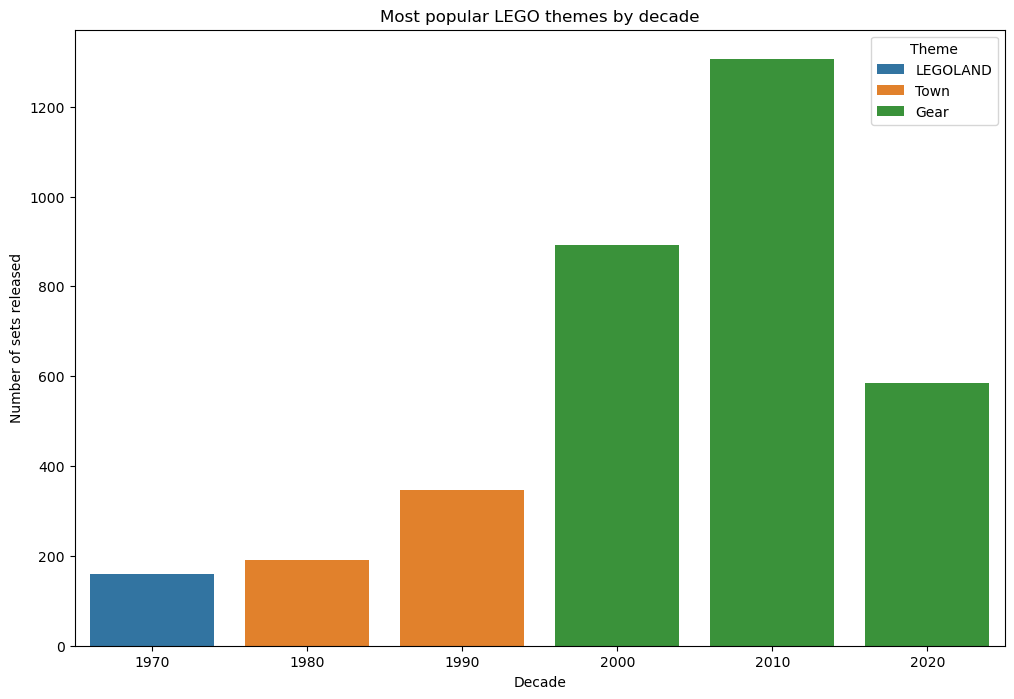

In [24]:
# plot data using bar chart
plt.figure(figsize = (12, 8))
sns.barplot(x = 'decade', y = 'count', hue = 'theme', dodge = False, data = most_popular_themes)
plt.title("Most popular LEGO themes by decade")
plt.xlabel("Decade")
plt.ylabel("Number of sets released")
plt.legend(title = 'Theme')
plt.show()

### We can see that in the 1970s, LEGOLAND was the most popular theme, followed by Town in the 1980s and 1990s. Gear has been the most popular theme since 2020.

***

## Q3: Is there a relationship between the price of a set and its number of pieces?

In [26]:
# clean data for any NaN values in data required to analyze and answer question
df_cleaned_for_price_pieces = df.dropna(subset = ['pieces', 'US_retailPrice'])

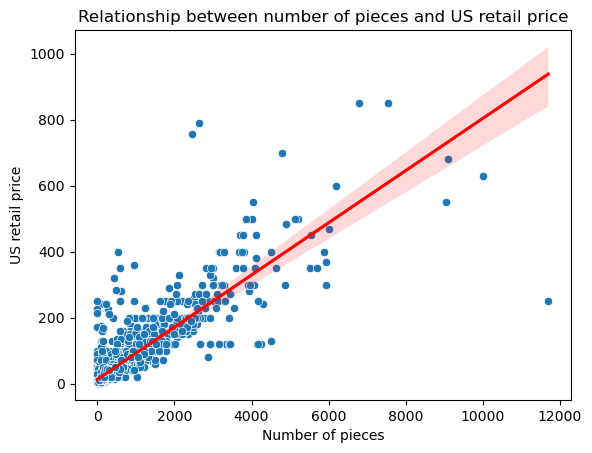

In [27]:
# plot data using scatterplot and linear regression
sns.scatterplot(data = df_cleaned_for_price_pieces, x = 'pieces', y = 'US_retailPrice')
sns.regplot(data = df_cleaned_for_price_pieces, x = 'pieces', y = 'US_retailPrice', scatter = False, color = 'red')
plt.title('Relationship between number of pieces and US retail price')
plt.xlabel('Number of pieces')
plt.ylabel('US retail price')

plt.show()

In [28]:
# let's take it a step further and check correlation coefficient
correlation_coeff = df_cleaned_for_price_pieces['pieces'].corr(df_cleaned_for_price_pieces['US_retailPrice'])
print(f"Pearson correlation coefficient between number of pieces and US retail price: {correlation_coeff: .2f}")

Pearson correlation coefficient between number of pieces and US retail price:  0.87


### Yes, there is a relationship between the price of a set and its number of pieces. As the set has more pieces, we can expect the price to go up, as witnessed in the scatterplot. This is further evident with a strong positive correlation coefficient of 0.87.

***

## Q4: Are LEGO minifigures most closely tied to licensed sets?

In [30]:
# start by cleaning data
# fill NaN values in minifigs column with 0
df['minifigs'].fillna(0, inplace = True)

# drop rows where themeGroup column is NaN
df_cleaned = df.dropna(subset = ['themeGroup']).copy()

In [31]:
# categorize sets based on the 'themeGroup' column
df_cleaned.loc[:, 'is_licensed'] = df_cleaned['themeGroup'] == 'Licensed'

In [32]:
# calculate the average number of minifigures for licensed and unlicensed sets
average_minifigs = df_cleaned.groupby('is_licensed')['minifigs'].mean()

# replace the index values from True/False to Licensed/Unlicensed
average_minifigs.index = average_minifigs.index.map({True: 'Licensed', False: 'Unlicensed'})

print("Average number of minifigures in sets:")
print(average_minifigs)

Average number of minifigures in sets:
is_licensed
Unlicensed    1.029663
Licensed      2.372260
Name: minifigs, dtype: float64


In [33]:
# let's dig a bit deeper and perform a T-test

# separate the data into licensed and unlicensed sets
licensed_minifigs = df_cleaned[df_cleaned['is_licensed']]['minifigs']
unlicensed_minifigs = df_cleaned[~df_cleaned['is_licensed']]['minifigs']

# perform t-test
t_stat, p_value = ttest_ind(licensed_minifigs, unlicensed_minifigs)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 26.976740851385287, P-value: 3.0731033216730396e-157


### From data analyzed, the LEGO minifigures is closely tied to licensed sets. On average, the number of minifigures in a licensed set is 2.3 while unlicensed is 1. This is further evident from the T-test that shows a statistically significant difference between the number of minifigures in licensed versus unlicensed LEGO sets.